In [1]:
def byte_rep(n) :
    return chr(n).encode("utf-8")

for n in range(100,121) :
    print(n)
    print(byte_rep(n))
    print(n.to_bytes(n.bit_length(), byteorder = "big"))

100
b'd'
b'\x00\x00\x00\x00\x00\x00d'
101
b'e'
b'\x00\x00\x00\x00\x00\x00e'
102
b'f'
b'\x00\x00\x00\x00\x00\x00f'
103
b'g'
b'\x00\x00\x00\x00\x00\x00g'
104
b'h'
b'\x00\x00\x00\x00\x00\x00h'
105
b'i'
b'\x00\x00\x00\x00\x00\x00i'
106
b'j'
b'\x00\x00\x00\x00\x00\x00j'
107
b'k'
b'\x00\x00\x00\x00\x00\x00k'
108
b'l'
b'\x00\x00\x00\x00\x00\x00l'
109
b'm'
b'\x00\x00\x00\x00\x00\x00m'
110
b'n'
b'\x00\x00\x00\x00\x00\x00n'
111
b'o'
b'\x00\x00\x00\x00\x00\x00o'
112
b'p'
b'\x00\x00\x00\x00\x00\x00p'
113
b'q'
b'\x00\x00\x00\x00\x00\x00q'
114
b'r'
b'\x00\x00\x00\x00\x00\x00r'
115
b's'
b'\x00\x00\x00\x00\x00\x00s'
116
b't'
b'\x00\x00\x00\x00\x00\x00t'
117
b'u'
b'\x00\x00\x00\x00\x00\x00u'
118
b'v'
b'\x00\x00\x00\x00\x00\x00v'
119
b'w'
b'\x00\x00\x00\x00\x00\x00w'
120
b'x'
b'\x00\x00\x00\x00\x00\x00x'


In [2]:
n.to_bytes(n.bit_length(), "big")

b'\x00\x00\x00\x00\x00\x00x'

In [3]:
ord(chr(100))

100

# Inizia da qui
i simboli in una trasmissione/comunicazione sono trasferiti in bytes (cfr download pagine web grezze mediante `urllib.request.urlopen()` senza `.decode()`); i codici ASCII/Unicode/UTF-8 eccetera associano ad ogni numero espresso in bytes (UNSIGNED!) un carattere dell'alfabeto, che infatti è quello che python mostra applicando print ad una variabile di tipo bytes

In [4]:
# https://it.wikipedia.org/wiki/ASCII
# il simbolo 44 aka 0101100 è ,

a = chr(44)
b = chr(44).encode("utf-8")
print("senza encoding:",a)
print("con encoding:",b)
print("type(senza):",type(a))
print("type(con):",type(b))

print("ord lavora altrettanto bene con stringhe e con bytes?")
print(ord(a) == ord(b))
print("Sì, in python3 c'è una naturale equivalenza fra stringhe e loro rappresentazione in bytes secondo il codice UTF-8")

senza encoding: ,
con encoding: b','
type(senza): <class 'str'>
type(con): <class 'bytes'>
ord lavora altrettanto bene con stringhe e con bytes?
True
Sì, in python3 c'è una naturale equivalenza fra stringhe e loro rappresentazione in bytes secondo il codice UTF-8


In [5]:
# IMPORTANTE: le comunicazioni in ASCII eccetera avvengono con interi unsigned in quanto le variabili di tipo byte hanno l'interpretazione di numero ordinale di un dato carattere nel codice (cfr help(chr)); questo significa che i numeri negativi vengono tagliati fuori a meno che non ci preoccupiamo noi di utilizzare il 2's complement. Nella pratica, quindi, dobbiamo fare due cose:
# 1) mappare i numeri negativi nella seconda metà dell'intervallo di interesse prima di chiamare chr (che infatti fallisce se proviamo a passargli un intero negativo, accetta solo unsigned); in questo modo
# garantiamo che numeri di ogni tipo vengano convertiti in un formato compatibile con la comunicazione via porta seriale. 
# 2) quando ci arrivano i numeri sempre mediante codice ASCII dobbiamo considerare che questi sono stati inviati presupponendo la convenzione signed i.e. il 2's complement (coerentemente con l'utilizzo della funzione signed del vhdl); pertanto li dobbiamo mappare nell'intervallo corretto, cioè se sono nella seconda metà dell'intervallo di interesse li ri-rendiamo negativi sottraendo la quantità opportuna.



# https://www.exploringbinary.com/twos-complement-converter/ alla fine riguardo la conversione da decimale a binario signed i.e. con 2's complement
# se ho un numero decimale da convertire lo converto banalmente se è non negativo, gli sommo prima 2^n_bits se è strettamente minore di 0
# se ho un numero binario signed da convertire in decimale lo converto e non faccio niente se il risultato è in [0,2^n_bits-1]; se è maggiore devo sottrargli 2^n_bits
# (nel nostro caso n_bytes = 8 e 2^8 = 256)
# questo perché nella convenzione del 2's complement con 8 bits i valori da 0 a 127 sono lasciati stare, mentre quelli da 128 a 255 vengono mappati negli opposti. Questo equivale a mappare [0,255] in [-128,127]
# spiega inoltre perché in questa convenzione possiamo usare solo 128 valori distinti in modulo: dal momento che un bit è riservato al segno (il primo bit è 0 se il numero è positivo, 1 se negativo) abbiamo solo 
# 7 bits efficaci e quindi andiamo solo da 0 a 128 - 1 = 127

def comunicazione_seriale(n) :
    # send
    if n < 0 :
        x = chr(256+n)
    else :
        x = chr(n)
    
    #x = x.encode("utf-8") # questo rompe ord ma potrebbe servire con serial, non si sa mai

    # receive
    y = ord(x)
    if y > 127 :
        y = ord(x) - 256
    else :
        pass

    return y 

l = [10,-10]

for i in l :
    print(f"numero originale: {i}")
    print(f"numero ricostruito dopo la comunicazione: {comunicazione_seriale(i)}")

numero originale: 10
numero ricostruito dopo la comunicazione: 10
numero originale: -10
numero ricostruito dopo la comunicazione: -10


In [6]:
# alla fine tutto questo discorso di chr e ord si può evitare; non sfruttiamo mai esplicitamente la mappa intero in bytes --> carattere fornita dal codice ASCII ecc., è solo un modo per convertire da decimale a binario e viceversa in un formato che sia compatibile con la conversione al tipo bytes (cosa evidentemente non possibile per il tipo int ma possibile per str, tanto che int utilizzato per cambiare base funziona solo passandogli delle stringhe)

n = 44
if n >= 0 :
    x = bin(n)[2:].encode("utf-8") # nota: si deve levare lo 0b che python antepone (bin restituisce una stringa)
else :
    x = bin(n)[3:].encode("utf-8")
print(x) # sto usando un metodo proprio delle stringhe, non dell'output di chr in particolare!
print(type(x))
#print(int(str(44), base=2)) # dà errore per qualche motivo
#print(ord(x)) # anche qui errore... forse già solo per questo conviene usare chr e ord

b'101100'
<class 'bytes'>


morale della favola della cella precedente: chr e ord tecnicamente non sono indispensabili ma sono più semplici da utilizzare di bin, int e compagnia

In [7]:
str(x)

"b'101100'"

In [8]:
bin(44)

'0b101100'

In [9]:
type(bin(44))

str

In [10]:
chr(44).encode("utf-8")

b','

In [11]:
from urllib.request import urlopen 

url = "http://www.hasthelargehadroncolliderdestroyedtheworldyet.com/"

for i in urlopen(url) :
    print(i)

b'<html>\n'
b'<head>\n'
b'<style type="text/css">\n'
b'body {\n'
b'background-color: #000;\n'
b'color: #fff;\n'
b'font-family:arial,helvetica;\n'
b'font-size:5em;\n'
b'text-align: center;\n'
b'}\n'
b'#main {\n'
b'margin: 0px auto;\n'
b'margin-top: 150px;\n'
b'width: 350px;\n'
b'text-align:center;\n'
b'}\n'
b'</style>\n'
b'<title>Has the Large Hadron Collider destroyed the world yet?</title>\n'
b'<link rel="alternate" type="application/atom+xml" title="Recent Entries"\n'
b'href="http://www.hasthelargehadroncolliderdestroyedtheworldyet.com/atom.xml" />\n'
b'</head>\n'
b'<body>\n'
b'<div id="main">\n'
b'<script type="text/javascript">\n'
b'if (!(typeof worldHasEnded == "undefined")) {\n'
b'document.write("YUP.");\n'
b'} else {\n'
b'document.write("NOPE.");\n'
b'}\n'
b'</script>\n'
b'<noscript>NOPE.</noscript>\n'
b'</div>\n'
b'<script type="text/javascript">\n'
b'var gaJsHost = (("https:" == document.location.protocol) ? "https://ssl." :\n'
b'"http://www.");\n'
b'document.write(unescape("%

In [12]:
for i in urlopen(url) :
    print(i.decode())

<html>

<head>

<style type="text/css">

body {

background-color: #000;

color: #fff;

font-family:arial,helvetica;

font-size:5em;

text-align: center;

}

#main {

margin: 0px auto;

margin-top: 150px;

width: 350px;

text-align:center;

}

</style>

<title>Has the Large Hadron Collider destroyed the world yet?</title>

<link rel="alternate" type="application/atom+xml" title="Recent Entries"

href="http://www.hasthelargehadroncolliderdestroyedtheworldyet.com/atom.xml" />

</head>

<body>

<div id="main">

<script type="text/javascript">

if (!(typeof worldHasEnded == "undefined")) {

document.write("YUP.");

} else {

document.write("NOPE.");

}

</script>

<noscript>NOPE.</noscript>

</div>

<script type="text/javascript">

var gaJsHost = (("https:" == document.location.protocol) ? "https://ssl." :

"http://www.");

document.write(unescape("%3Cscript src='" + gaJsHost +

"google-analytics.com/ga.js' type='text/javascript'%3E%3C/script%3E"));

</script>

<script type="text/javascrip

# Filtri

In [1]:
import numpy as np 
from scipy.signal import firwin, freqz, freqs
import matplotlib.pyplot as plt 
import scipy
import librosa
from scipy.io import wavfile
from numba import njit
import seaborn as sns
import pandas as pd

In [2]:
M = np.loadtxt("mario.txt", delimiter=",")

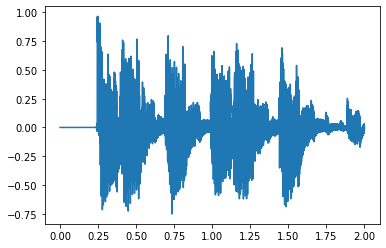

In [3]:
t = M[:,0]
x = M[:,1]
plt.plot(t,x); # x = tutti minori di 1 in modulo, per questo vanno moltiplicati per 2^qualcosa (ad es. 8)

In [16]:
# with open("banana.txt","w") as fh :
#     for i in range(10) :
#         fh.write(str(i)+"\n")

In [8]:
x.shape[0]

22058

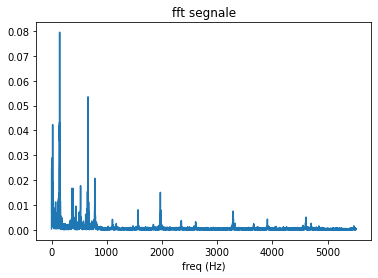

In [63]:
# la normalizzazione di default della fft di numpy è inversa rispetto a quella di matlab nel senso che non devo moltiplicare per il 1/numero valori
# RETTIFICA: ESATTAMENTE COME IN MATLAB DEVO MOLTIPLICARE PER 2/N MEZZO VETTORE
a = np.abs(np.fft.fft(x))
a = a[0:len(a)//2]*2/a.shape[0]
f = np.linspace(0,11025//2,len(a))
plt.plot(f,a);
plt.xlabel("freq (Hz)");
plt.title("fft segnale");

7.060917530382947


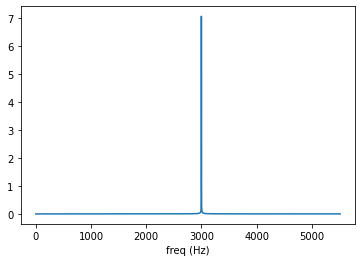

In [61]:
xs = 8*np.sin(2*np.pi*3000*t)
a_s = np.abs(np.fft.fft(xs))/xs.shape[0]
a_s = 2*a_s[0:len(a_s)//2]
f = np.linspace(0,11025//2,len(a_s))
plt.plot(f,a_s);
plt.xlabel("freq (Hz)");
print(a_s.max())

In [57]:
a_s.max()/7.0609

11029.027382145836

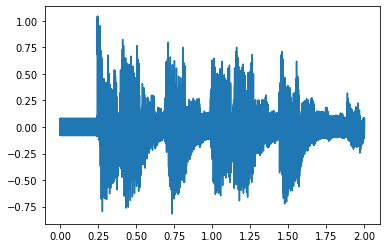

In [40]:
xc = x + 8e-2*np.sin(2*np.pi*4000*t) #2.5e-2 va bene come ampiezza del rumore per tutta la canzone
plt.plot(t,xc);

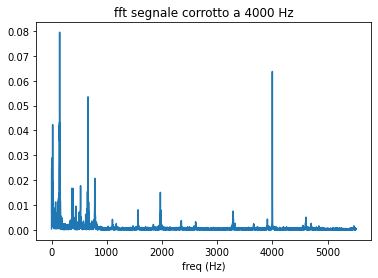

In [64]:
ac = np.abs(np.fft.fft(xc))/xc.shape[0]
#a = 2*a[0:len(a)//2]
ac = 2*ac[0:len(ac)//2]
f = np.linspace(0,11025//2,len(ac))
plt.plot(f,ac);
plt.xlabel("freq (Hz)");
plt.title("fft segnale corrotto a 4000 Hz");

In [ ]:
k_data = 122 # buono per i 2 secondi iniziali dell'audio

with open("input.txt","w") as fh :
    np.savetxt(fh, (xc*k_data).astype(int), fmt="%d")

In [31]:
k_data = 122
n_samples = xc.shape[0]
d = (n_samples-8)/50 
print(d)
d = int(d)

xc2 = k_data*xc[:-8]
indici = range(0,len(xc2),d) 
for j,i in enumerate(indici) :
    v = np.hstack((xc2[i:i+d], np.zeros(9))).astype(int) # aggiungo 9 zeri alla fine per "pulire la pipeline" e in modo che ogni file abbia esattamente 450 elementi
    with open(f"./input/input{j}.txt","w") as fh :
        np.savetxt(fh, v, fmt="%d")

441.0


In [33]:
450*4+418-36 #  4*9=36 erano 0 di pulizia

2182

In [189]:
firwin(numtaps=N_taps, cutoff=1500, fs=fs, pass_zero="lowpass")

array([0.0013197 , 0.03310796, 0.15903679, 0.30653556, 0.30653556,
       0.15903679, 0.03310796, 0.0013197 ])

[-0.00213829 -0.02910803  0.07414699  0.45709933  0.45709933  0.07414699
 -0.02910803 -0.00213829]


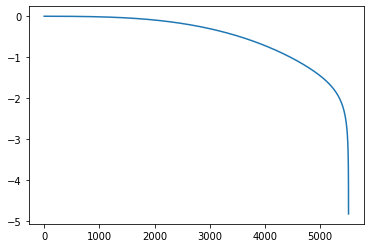

In [6]:
N_taps = 8
fs = 11025
fc = 4000 - 1000 # meglio scendere un po', ma occhio ad essere troppo aggressivo sulla regione intorno a 5000 Hz
coeffs = firwin(numtaps=N_taps, cutoff=fc, fs=fs, pass_zero="lowpass")
print(coeffs)
[w,h] = freqz(coeffs, worN=len(x))
w *= (fs/2)/np.pi # di default w è normalizzato all'intervallo [0,pi]; lo mappo a [0,fnyq] (vedi documentazione freqz)
h = np.log10(np.abs(h)) # abs perché è complesso, log10 perché si usano i dB
plt.plot(w,h);

In [21]:
ciao = np.fft.fftfreq(len(x), 1/fs) #fftfreq è come un linspace ma del tipo [metà positiva, metà negativa] delle frequenze. Basterebbe prendere solo la prima metà ma per curiosità controllo fftshift
k = np.fft.fftshift(ciao) # fftshift fa in modo che si abbia [metà negativa, metà positiva] esattamente come si farebbe nel caso di un plot
k.shape[0]//2
ind = np.nonzero(k == 0)[0]
ind = ind[0]
#print(ind)
k = k[ind:]
#k.shape
np.allclose(f,k, atol=1e-5, rtol = 1e-3) 

True

In [67]:
# FILTRO CONVOLUZIONALE CON 0 PADDING INIZIALE

# uno zero padding di N_taps-1 all'inizio e alla fine permette di sapere dove tagliare per togliere la munnizza (?)
N = N_taps
# per ora basta mettere 
y = np.hstack((np.zeros((7,)),xc)) # 7 è N-1
#y.shape[0]-7 == x.shape[0]

output = np.zeros((y.shape[0],))

for n in range(7,len(output)) : # i primi 7 (= N-1) elementi (da 0 a 6) sono solo uno zero padding
    for i in range(N) :
        output[n] += coeffs[i]*y[n-i]

output = output[8:] # tolgo i primi 7 valori fasulli

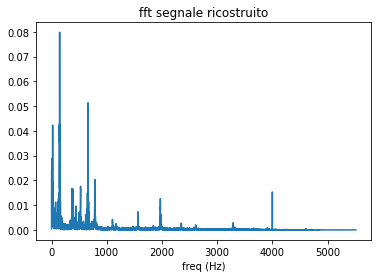

In [68]:
a = np.abs(np.fft.fft(output))/output.shape[0]
a = 2*a[0:len(a)//2]
f = np.linspace(0,11025//2,len(a))
plt.plot(f,a);
plt.xlabel("freq (Hz)");
plt.title("fft segnale ricostruito");

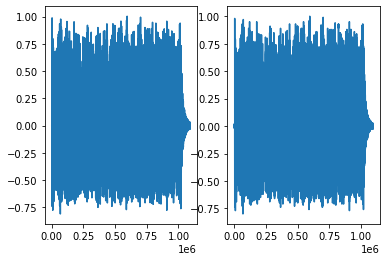

In [19]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(y);
ax[1].plot((y*100).astype(int)/100);
# y.max() è 1 e qualcosa, così diventa 100 e qualcosa (che elimino con int) (entro 2^7, ok); quando ridivido (stavolta a float) riottengo lo stesso numero di partenza ma con solo 2 cifre decimali - quindi l'approssimazione fatta è tale per cui i nostri numeri sono gli stessi di prima a meno di un fattore O(10^-3)

## SOMMARE UNA COSTANTE AIUTEREBBE AD AVERE UN VETTORE POSITIVO E QUINDI 0 NECESSITà DEL SEGNO E QUINDI UN BIT LIBERO IN PIù E QUINDI PIù RISOLUZIONE

In [30]:
# Variante ad interi

# FILTRO CONVOLUZIONALE CON 0 PADDING INIZIALE

# uno zero padding di N_taps-1 all'inizio e alla fine permette di sapere dove tagliare per togliere la munnizza (?)
N = N_taps
# per ora basta mettere 
coeffs_int = (100*coeffs).astype(int)
y_int = np.hstack((np.zeros((7,)),100*xc)).astype(int) # 7 è N-1
#y.shape[0]-7 == x.shape[0]

output_int = np.zeros((y_int.shape[0],), dtype=int)

for n in range(7,len(output)) : # i primi 7 (= N-1) elementi (da 0 a 6) sono solo uno zero padding
    for i in range(N) :
        output_int[n] += int(coeffs_int[i]*y_int[n-i])

output_int = output_int[8:] # tolgo i primi 7 valori fasulli

In [76]:
int("0b"+str(10), 2)

2

In [77]:
c = int("0b"+str(1000111111100000000), 2)
num = output_int.max()
print("numero originale:",num)
print("bit di segno (19) e dal 15 al 9 (compresi e contando da 1)", num & c)
print("bit di segno (19) e dal 18 al 12 (compresi e contando da 1)", num >> (19-8)) # meglio fare così: direttamente lo shift in questo caso, ci serve solo la parte a sinistra

# posso tenere solo 8 dei 19 bit i.e. 19-8=11 vanno buttati

numero originale: 9594
bit di segno (19) e dal 15 al 9 (compresi e contando da 1) 9472
bit di segno (19) e dal 18 al 12 (compresi e contando da 1) 4


In [85]:
numero = 0
for i,n in enumerate(str(1000111111100000000)) :
    numero += int(n)*2**(18-i) # si conta da zero; vado da 2^0 per il bit 0 a 2^18 per il bit di posto 18 da zero/19 da uno
print(numero)
print(c)
print(numero == c)

294656
294656
True


In [46]:
int(num).bit_length()

14

In [7]:
(coeffs*278).astype(int) # buono per fc = 3000

array([  0,  -8,  20, 127, 127,  20,  -8,   0])

In [79]:
print(num/100)
print((num & c << 10)/100)

95.94
0.0


In [70]:
print("la differenza media fra i vettori di output usando tutte/solo 2 cifre decimali è in percentuale:",100*np.abs((output - output_int/100).mean()))

la differenza media fra i vettori di output usando tutte/solo 2 cifre decimali è in percentuale: 0.3751069947866874


In [6]:
np.abs(xc).max()

1.0024733185400099

In [181]:
xc.shape[0]

1091840

In [71]:
@njit
def fir_int(input, coeffs_int, Nt) :
    output_int = np.zeros(input.shape[0])
    for n in range(7, len(output_int)) :
        for i in range(Nt) :
            output_int[n] += int(coeffs_int[i]*input[n-i])
    return output_int

@njit
def fir_float(input, coeffs, Nt) :
    output_float = np.zeros(input.shape[0])
    for n in range(7, len(output_float)) :
        for i in range(Nt) :
            output_float[n] += coeffs[i]*input[n-i]
    return output_float

In [72]:
# qui metto una simulazione completa di quello che dovrebbe avvenire nella fpga

# Variante ad interi tagliati opportunamente. Fattore dei coefficienti: 278 (per restare entro 127 come valore max), fattore dei dati: 127 (idem, xc.max() è dell'ordine dell'unità)
k_coeff = 278
k_data = 127
# FILTRO CONVOLUZIONALE CON 0 PADDING INIZIALE

# uno zero padding di N_taps-1 all'inizio e alla fine permette di sapere dove tagliare per togliere la munnizza (?)
N = 8#N_taps
# per ora basta mettere 
coeffs_int = (k_coeff*coeffs).astype(int)
y_int = np.hstack((np.zeros((7,)),k_data*xc)).astype(int) # 7 è N-1
#y.shape[0]-7 == x.shape[0]

# output_int = np.zeros((y_int.shape[0],), dtype=int)

# for n in range(7,len(output_int)) : # i primi 7 (= N-1) elementi (da 0 a 6) sono solo uno zero padding
#     for i in range(N) :
#         output_int[n] += int(coeffs_int[i]*y_int[n-i])
output_int = fir_int(y_int, coeffs_int, N)

output_int = output_int[8:] # tolgo i primi 7 valori fasulli

output_int /= k_coeff
output_int /= k_data
print(output_int)

y_float = np.hstack((np.zeros((7,)),k_data*xc))
output_float = fir_float(y_float, coeffs, N)
output_float = output_float[8:]/k_data
print(output_float)

# df = pd.DataFrame({"float":output_float, "int": output_int})
# sns.lineplot(data=df, palette="tab10", linewidth=2.5)

[ 0.         -0.00158613  0.00623124 ... -0.00382371  0.012859
 -0.00135954]
[-0.00012994 -0.00159982  0.00671673 ... -0.00122545  0.0141965
 -0.00282599]


In [87]:
int(np.abs(xc).max()*122)

127

In [94]:
xc.shape[0]//30

735

In [88]:
k_data = 122

with open("input.txt","w") as fh :
    np.savetxt(fh, (xc*k_data).astype(int), fmt="%d")

In [185]:
print(coeffs_int)

[  0  -8  20 127 127  20  -8   0]


In [65]:
c = int("0b"+str(1000111111100000000), 2)
bin(int(k_coeff*k_data*output_int.max()))

'0b1000010011011101'

In [77]:
l = ["1"] + ["0"] * 18
for i in range(9,16) :
    l[-i] = "1"

s = "0b" + "".join(l)
b = int(s,2)
#print(b == c)
#print(b)
int(2e4) & b

# meglio recuperare il primo bit separatamente..!

19968

In [133]:
print(bin(b)[2:])
#print(4*"0" + bin(20000)[2:])
#print(4*"0" + bin(20000 & b)[2:])
#print(20000 & b)
print(bin(c)[2:])
print(20000 & c)
print(20000 & (c - 2**18) + ()*2**18)

1000111111100000000
0000100111000100000
0000100111000000000
19968
1000111111100000000
19968


In [134]:
print(20000 & (c - 2**19))

19968


average difference between float vs int: 0.003434635399436436


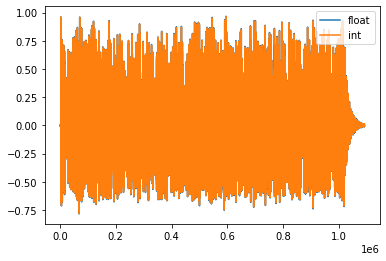

In [60]:
plt.plot(output_float, label = "float");
plt.plot(output_int, label = "int");
plt.legend(loc = "upper right");
print("average difference between float vs int:",(np.abs(output_float - output_int)).mean())

In [162]:
def find_b(bin) :
    l = ["0"] * 19 #["1"] + ["0"] * 18
    for i in range(bin, (bin+7)) :
        l[-i] = "1"

    s = "0b" + "".join(l)
    b = int(s,2)
    return b

# #@njit
# def fir_int_approx(input, coeffs, Nt, b) :
#     output_int_approx = np.zeros(input.shape[0], dtype=int)
#     for n in range(7, len(output_int_approx)) :
#         for i in range(Nt) :
#             output_int_approx[n] += int(coeffs[i]*input[n-i]) 
#     for i in range(len(output_int_approx)) :
#         output_int_approx[i] = (output_int_approx[i] & b) >> (19-8)
#     return output_int_approx

def fir_int_approx(input, coeffs, Nt, b) :
    output_int_approx = fir_int(input, coeffs, Nt)
    for i in range(len(output_int_approx)) :
        output_int_approx[i] = ((int(output_int_approx[i]) >> 8) & (2**7-1)) + (int(output_int_approx[i]) & 2**18)*2**7
        #output_int_approx[i] = ((int(output_int_approx[i]) & b) >> 8)+ (int(output_int_approx[i]) & 2**18)*2**7 #aggiungo il primo bit del numero tutto a sinistra sommando bit*2**8. Estraggo questo bit con un altro and
    return output_int_approx

In [161]:
bin(2**7)[2:]

'10000000'

In [153]:
len(bin(2**8)[2:])

9

In [168]:
a = int(output_int[-1]*k_coeff*k_data)
a
#print(bin(a)[3:])

-134

In [163]:
lb = [find_b(i) for i in range(1,12)] # da 1 a 11 vanno bene (contando da 1 visto che uso l[-1])

output_int_approx = fir_int_approx(y_int, coeffs_int, N, find_b(9))

output_int_approx = output_int_approx[8:] # tolgo i primi 7 valori fasulli

output_int_approx = output_int_approx / (k_coeff*k_data) #* 2**11
# for i in range(len(output_int_approx)) :
#     output_int_approx[i] = int(output_int_approx[i]) << 11

print(output_int_approx)

[  0.         950.39253951   0.         ... 950.39253951   0.
 950.39253951]


average difference between float vs int: 955.6815923093807


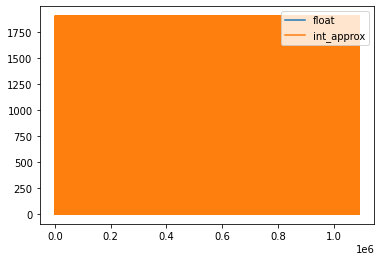

In [141]:
plt.plot(output_float, label = "float");
plt.plot(output_int_approx, label = "int_approx");
plt.legend(loc = "upper right");
print("average difference between float vs int:",(np.abs(output_float - output_int_approx)).mean())

In [196]:
f = np.loadtxt("output.txt")

In [198]:
f.shape[0]

2697

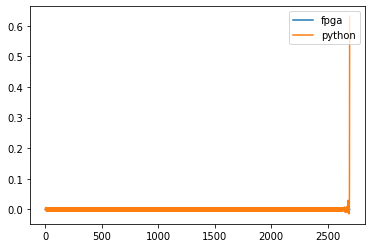

In [206]:
plt.plot(f/(k_data*k_coeff), label="fpga")
plt.plot(output_float[:f.shape[0]], label="python")
plt.legend(loc="upper right")

In [ ]:
#def distance_from_float(bin_list) :
    

# Altre cose

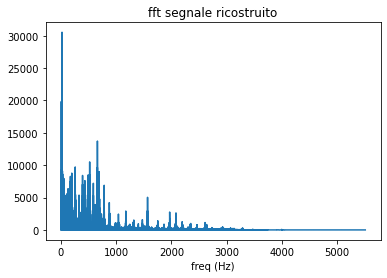

In [24]:
# da funzionizzare al variare di N!
N_taps = 25
fs = 11025
fc = 4000 - 1000 # meglio scendere un po'
coeffs = firwin(numtaps=N_taps, cutoff=fc, fs=fs, pass_zero="lowpass")

# uno zero padding di N_taps-1 all'inizio e alla fine permette di sapere dove tagliare per togliere la munnizza (?)
N = N_taps
# per ora basta mettere 
y = np.hstack((np.zeros((7,)),xc)) # 7 è N-1
#y.shape[0]-7 == x.shape[0]

output = np.zeros((y.shape[0],))

for n in range(7,len(output)) : # i primi 7 (= N-1) elementi sono solo uno zero padding
    for i in range(N) :
        output[n] += coeffs[i]*y[n-i]

a = np.abs(np.fft.fft(output))/output.shape[0]
a = 2*a[0:len(a)//2]
f = np.linspace(0,11025//2,len(a))
plt.plot(f,a);
plt.xlabel("freq (Hz)");
plt.title("fft segnale ricostruito");

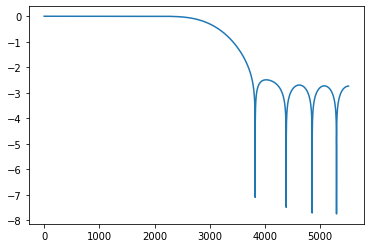

In [27]:
N_taps = 25
fs = 11025
fc = 4000 - 1000 # meglio scendere un po', ma occhio ad essere troppo aggressivo sulla regione intorno a 5000 Hz
coeffs = firwin(numtaps=N_taps, cutoff=fc, fs=fs, pass_zero="lowpass")
#coeffs
[w,h] = freqz(coeffs, worN=len(x))
w *= (fs/2)/np.pi # di default w è normalizzato all'intervallo [0,pi]; lo mappo a [0,fnyq] (vedi documentazione freqz)
h = np.log10(np.abs(h)) # abs perché è complesso, log10 perché si usano i dB
plt.plot(w,h);